# Assignment 2: Engineering Predictive Features

**Student Name:** Jemiran Hunter

**Date:** 2/7/2026

---

## Assignment Overview

In this assignment, you'll practice feature engineering by creating new predictive features from the Ames Housing dataset. You'll build a baseline model with raw features, engineer at least 5 new features based on real estate intuition, and measure how feature engineering improves model performance.

---

## Step 1: Import Libraries and Load Data

In [43]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [44]:
# Load the Ames Housing dataset
# TODO Load train.csv from the data folder
df = pd.read_csv(r"C:\Users\Ekaza-BTG PC4\feature_engineering_fundamentals\data\train.csv")  # Replace with pd.read_csv()

# Display basic information
# TODO Display the first few rows and basic info about the dataset


print("\n" + "="*80)
print("CHECKPOINT: Verify dataset loaded correctly")
print(f"Dataset shape: {df.shape if df is not None else 'Not loaded'}")
print("="*80)


CHECKPOINT: Verify dataset loaded correctly
Dataset shape: (1460, 81)


---
## Step 2: Build Baseline Model with Raw Features

### Select Raw Features for Baseline

Select 10-15 raw features to use in your baseline model. Here's a suggested starting set (you can adjust):

**Suggested features:**
- `GrLivArea` - Above grade living area square feet
- `OverallQual` - Overall material and finish quality
- `YearBuilt` - Original construction year
- `TotalBsmtSF` - Total basement square feet
- `FullBath` - Full bathrooms above grade
- `BedroomAbvGr` - Bedrooms above grade
- `GarageArea` - Size of garage in square feet
- `LotArea` - Lot size in square feet
- `Neighborhood` - Physical location (categorical)
- Add 5-10 more features you think are important

In [45]:
# Select features for baseline model
# TODO Create a list of feature names you want to use
baseline_features = [
    'LotArea',
    'OverallQual',
    'BedroomAbvGr',
    'Street',
    'Neighborhood',
    'FullBath',
    'YearBuilt',
    'BldgType',
    'HouseStyle',
    
    # Add more features here
]

# TODO Create X (features) and y (target) for baseline
# Make sure to handle missing values and encode categorical variables
X_baseline = df[baseline_features]  # Replace with your feature matrix
y = df['SalePrice']  # Replace with df['SalePrice']

print(f"Baseline features selected: {len(baseline_features)}")
print(f"Target variable shape: {y.shape if y is not None else 'Not defined'}")

Baseline features selected: 9
Target variable shape: (1460,)


### Preprocess Baseline Features

In [46]:
# Handle missing values
# TODO Fill missing values appropriately
# Numeric: Use median or 0
# Categorical: Use 'None' or most frequent
print(df[baseline_features].dtypes)  # Check the first few features to identify which are numeric and which are categorical

df['LotArea'] = df['LotArea'].fillna(df['LotArea'].median())
df['OverallQual'] = df['OverallQual'].fillna(df['OverallQual'].median())
df['BedroomAbvGr'] = df['BedroomAbvGr'].fillna(df['BedroomAbvGr'].median())
df['Street'] = df['Street'].fillna('None')
df['Neighborhood'] = df['Neighborhood'].fillna('None')
df['FullBath'] = df['FullBath'].fillna(df['FullBath'].median())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median ())
df['BldgType'] = df['BldgType'].fillna('None')
df['HouseStyle'] = df['HouseStyle'].fillna('None')  


# Encode categorical variables
# TODO Use pd.get_dummies() for categorical features
X_baseline = pd.get_dummies(X_baseline, drop_first=True)


print("\n" + "="*80)
print("CHECKPOINT: After preprocessing")
print(f"X_baseline shape: {X_baseline.shape if X_baseline is not None else 'Not defined'}")
print(f"Missing values: {X_baseline.isnull().sum().sum() if X_baseline is not None else 'N/A'}")
print("="*80)

LotArea          int64
OverallQual      int64
BedroomAbvGr     int64
Street          object
Neighborhood    object
FullBath         int64
YearBuilt        int64
BldgType        object
HouseStyle      object
dtype: object

CHECKPOINT: After preprocessing
X_baseline shape: (1460, 41)
Missing values: 0


### Train Baseline Model

In [47]:
# Split data into train and test sets
# TODO Use train_test_split with test_size=0.2, random_state=42
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)  # Replace with train_test_split()

# Train baseline Random Forest model
# TODO Create and train RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model = RandomForestRegressor(n_estimators=100, random_state=42)
baseline_model.fit(X_train, y_train)

# Make predictions
# TODO Generate predictions on test set
baseline_predictions = baseline_model.predict(X_test)  # Replace with predictions

# Calculate metrics
# TODO Calculate R² and RMSE
baseline_r2 = r2_score(y_test, baseline_predictions)  # Replace with r2_score()
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))  # Replace with np.sqrt(mean_squared_error())

print("\n" + "="*80)
print("BASELINE MODEL RESULTS")
print("="*80)
print(f"R² Score: {baseline_r2 if baseline_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${baseline_rmse:,.2f}" if baseline_rmse is not None else "RMSE: Not calculated")
print("="*80)


BASELINE MODEL RESULTS
R² Score: 0.8270840043530574
RMSE: $36,418.71


### Visualize Baseline Feature Importances

C:\Users\Ekaza-BTG PC4\AppData\Local\Temp\ipykernel_17116\440153778.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


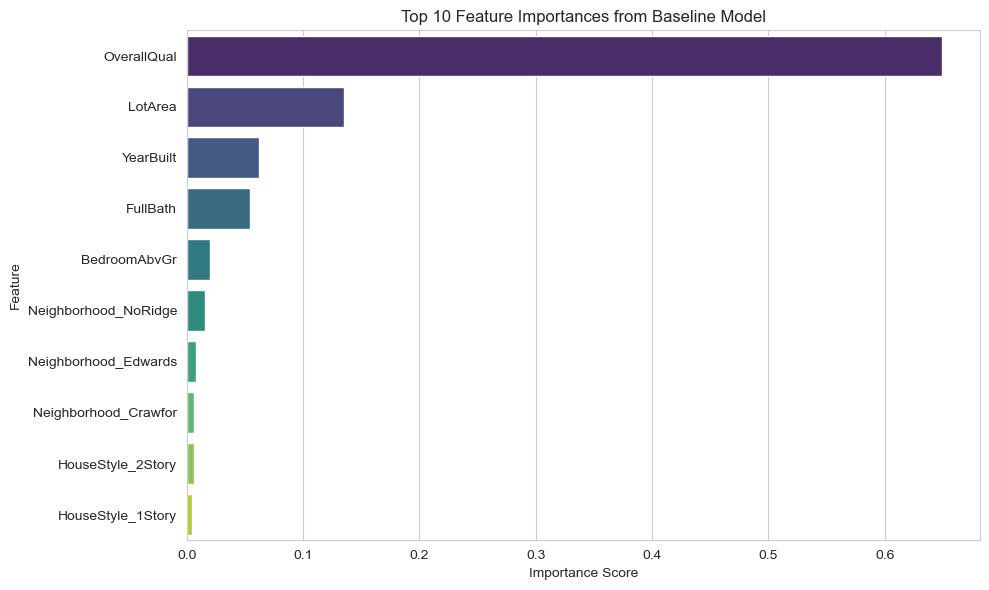


CHECKPOINT: Review which raw features are most important


In [48]:
# Extract and visualize feature importances
# TODO Get feature importances from baseline_model
# TODO Create a horizontal bar plot of top 10 features
feature_importances = pd.Series(baseline_model.feature_importances_, index=X_baseline.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Feature Importances from Baseline Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


print("\n" + "="*80)
print("CHECKPOINT: Review which raw features are most important")
print("="*80)

---
## Step 3: Engineer New Features

### Feature 1: [Feature Name] - [Category]

**Business Justification:**
[Write 2-3 sentences explaining what this feature measures, why it should predict house prices, and what real estate intuition supports it]

I selected OverallQaul as my first engieered feature due to it having higher importance and something I believe homebuyers consider when making purchases. I think it will have a decent role in prediciting house prices, and be a good feature to help develop the model. 

In [49]:
# TODO Create your first engineered feature
# Example: df['total_bathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']
df['OverallQual'] = df['OverallQual'] + 0.5 * df['OverallCond']

### Feature 2: [Feature Name] - [Category]

**Business Justification:**
[Write 2-3 sentences explaining this feature]

LotArea and FullBath count are other areas that I believe home buyers like to pay close attention to. These features are important for family size, maybe a family has a dog and like outdoor space and activity. Home buyers with larger families may pay close attention to FullBath count and size to make sure there is enough for everyone. These features could impact price predictions as with larger properties there is usually larger square foot to go along with that.

In [50]:
# TODO Create your second engineered feature
df['LotAreaPerBedroom'] = df['LotArea'] / (df['BedroomAbvGr'] + 1)  # Adding 1 to avoid division by zero

In [51]:
# TODO Create your second engineered feature
df['FullBathPlusHalf'] = df['FullBath'] + 0.5 * df['HalfBath']

### Feature 3: [Feature Name] - [Category]

**Business Justification:**
[Write 2-3 sentences explaining this feature]

YearBuilt is important because home buyers would like to understand if they are purchasing a new home or an older home, maybe they are on a specific budget, maybe they are looking for projects to remodel, or estimate cost on plumbing and electrical work. 

In [52]:
# TODO Create your third engineered feature
df['AgeAtSale'] = df['YrSold'] - df['YearBuilt']

### Feature 4: [Feature Name] - [Category]

**Business Justification:**
[Write 2-3 sentences explaining this feature]

Analyzig Bedroom count as another esstential factor in price predictions. Home buyers can get a clear idea of what they are willing to pay in comparison to the amount of bedrooms needed. Analyzing bedroom and bath combo helps family make decisions when evaluating budget and need.

In [53]:
# TODO Create your fourth engineered feature
df['TotalBedrooms'] = df['BedroomAbvGr'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']


### Feature 5: [Feature Name] - [Category]

**Business Justification:**
[Write 2-3 sentences explaining this feature]

NeighborhoodQuality is one of the features that will help families decide where they should look for an ideal home. Depending on the quaility of the neighborhood helps predict prices and helps to understand value and home size and added features. 

In [54]:
# TODO Create your fifth engineered feature
df['NeighborhoodQuality'] = df['Neighborhood'].map({
    'NridgHt': 5,
    'NoRidge': 5,
    'StoneBr': 5,
    'Somerst': 4,
    'Timber': 4,
    'Veenker': 4,
    'Crawfor': 3,
    'CollgCr': 3,
    'Gilbert': 3,
    'NWAmes': 3,
    'SawyerW': 2,
    'Mitchel': 2,
    'OldTown': 2,
    'BrkSide': 1,
    'Edwards': 1,
    'IDOTRR': 1,
    'MeadowV': 1,
    'SWISU': 1,
    'Blueste': 1
})


### Add More Engineered Features (Optional)

You can create additional features beyond the required 5 if you think they'll improve performance.

In [55]:
# Optional: Create additional engineered features


---
## Step 4: Train Model with Engineered Features

In [56]:
# Create feature list combining baseline + engineered features
# TODO List all your engineered feature names
engineered_features = ['OverallQual', 'LotAreaPerBedroom', 'FullBathPlusHalf', 'AgeAtSale', 'TotalBedrooms', 'NeighborhoodQuality'
    # Add your engineered feature names here
]

# Combine baseline and engineered features
all_features = baseline_features + engineered_features

# TODO Create X_engineered with all features
# Remember to handle missing values and encode categoricals
X_engineered = df[all_features]  # Replace with your feature matrix

print(f"Total features in engineered model: {len(all_features)}")
print(f"New engineered features: {len(engineered_features)}")

Total features in engineered model: 15
New engineered features: 6


In [57]:
# Split data (use same random_state for fair comparison)
# TODO Split X_engineered and y
# Encode categorical variables before splitting
X_engineered = pd.get_dummies(X_engineered, drop_first=True)

X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_engineered, y, test_size=0.2, random_state=42
)

# Train model with engineered features
# TODO Train RandomForestRegressor(n_estimators=100, random_state=42)
engineered_model = RandomForestRegressor(n_estimators=100, random_state=42)
engineered_model.fit(X_train_eng, y_train_eng)

# Make predictions
# TODO Generate predictions on test set
engineered_predictions = engineered_model.predict(X_test_eng)  # Replace with predictions

# Calculate metrics
# TODO Calculate R² and RMSE
engineered_r2 = r2_score(y_test_eng, engineered_predictions)  # Replace with r2_score()
engineered_rmse = np.sqrt(mean_squared_error(y_test_eng, engineered_predictions))  # Replace with np.sqrt(mean_squared_error())

print("\n" + "="*80)
print("ENGINEERED MODEL RESULTS")
print("="*80)
print(f"R² Score: {engineered_r2 if engineered_r2 is not None else 'Not calculated'}")
print(f"RMSE: ${engineered_rmse:,.2f}" if engineered_rmse is not None else "RMSE: Not calculated")
print("="*80)


ENGINEERED MODEL RESULTS
R² Score: 0.8547658576188523
RMSE: $33,376.54


---
## Step 5: Compare Models and Identify Most Valuable Features

### Create Comparison Table

In [58]:
# Create comparison DataFrame
# TODO Create a table comparing baseline vs engineered model
comparison = pd.DataFrame({
    'Model': ['Baseline', 'Engineered'],
    'R² Score': [baseline_r2, engineered_r2],
    'RMSE': [baseline_rmse, engineered_rmse]
})  # Replace with pd.DataFrame()

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
# TODO Display comparison table

print("="*80)

# Calculate improvement
if baseline_r2 is not None and engineered_r2 is not None:
    r2_improvement = ((engineered_r2 - baseline_r2) / baseline_r2) * 100
    rmse_improvement = ((baseline_rmse - engineered_rmse) / baseline_rmse) * 100
    print(f"\nR² Improvement: {r2_improvement:.2f}%")
    print(f"RMSE Improvement: {rmse_improvement:.2f}%")


MODEL COMPARISON

R² Improvement: 3.35%
RMSE Improvement: 8.35%


### Visualize Feature Importances from Engineered Model

C:\Users\Ekaza-BTG PC4\AppData\Local\Temp\ipykernel_17116\1385971546.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features_eng.values, y=top_features_eng.index, palette='magma')


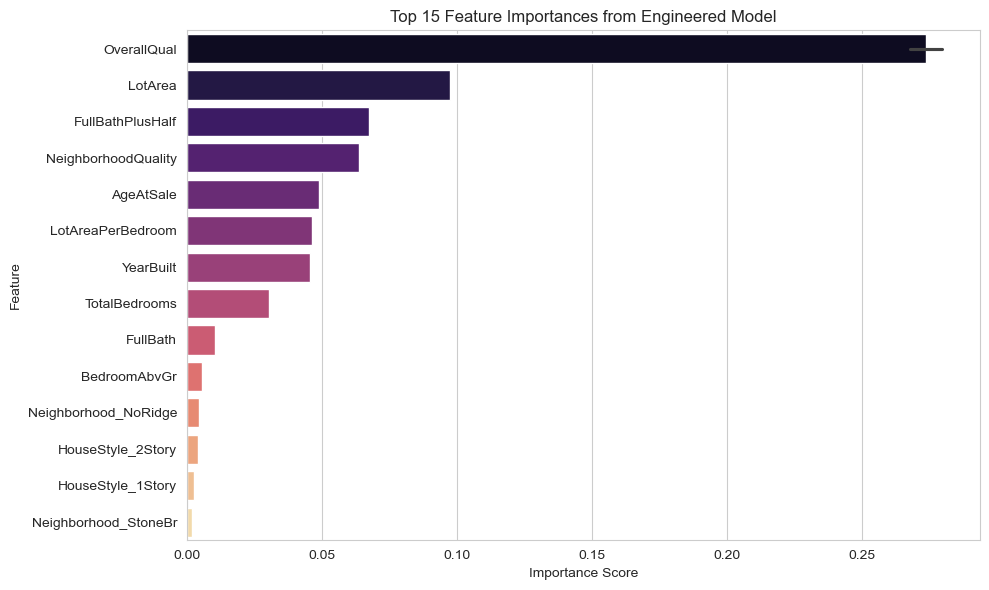

In [59]:
# Extract and visualize top 15 feature importances
# TODO Get feature importances from engineered_model
# TODO Create horizontal bar plot of top 15 features
feature_importances_eng = pd.Series(engineered_model.feature_importances_, index=X_engineered.columns)
top_features_eng = feature_importances_eng.sort_values(ascending=False).head(15)
sns.barplot(x=top_features_eng.values, y=top_features_eng.index, palette='magma')
plt.title('Top 15 Feature Importances from Engineered Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



### Analysis: Most Valuable Features

**Write 3-5 bullet points analyzing your results:**

- [Which of YOUR engineered features appeared in the top 15 most important features?]
- [Why do you think these specific features performed well?]
- [Were any engineered features less valuable than you expected? Why?]
- [What did you learn about feature engineering from this analysis?]
- [If you were to create more features, what would you try based on these results?]
==================================================================================================================================================
- NeighborhoodQuality was the number 1 feature ranked by importance. 
- I think the features I chose performed well because they were calculated using features that had high importance in the baseline model as well.
- BedroomAbvGr was the feature that didn't perform as well as I thought it would. Maybe because the importance levels of bedroom grades was important at all.
- I learned that you can improve a model's performance by being creative and thinking of ways to increase performance by analyzing feature importance, evalutating and engineering features to see if the model will improve and by how much.


---
## Step 6: Submit Your Work

Before submitting:
1. Make sure all code cells run without errors
2. Verify you have at least 5 engineered features with business justifications
3. Check that your comparison table and visualizations display correctly
4. Complete the analysis section above

Then push to GitHub:
```bash
git add .
git commit -m 'completed feature engineering assignment'
git push
```

Submit your GitHub repository link on the course platform.